# Sea Ice extent Analysis Arctic and Antarctic

## Data cleaning North

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

#loading the data
data_north = pd.read_excel('N_monthly_extent.xlsx')

data_north.shape

(529, 6)

In [2]:
# Quick check to data
data_north.head()

,year,month,data-type,hemisphere,extent,area
0,1979,1,Goddard,N,15.414,12.406
1,1980,1,Goddard,N,14.862,11.938
2,1981,1,Goddard,N,14.910,11.907
3,1982,1,Goddard,N,15.177,12.192
4,1983,1,Goddard,N,14.942,12.010


In [3]:
# Obtain descriptive stats
data_north.describe()

,year,month,extent,area
count,529.000000,529.000000,527.000000,526.000000
mean,2000.542533,6.489603,11.363397,9.420576
std,12.736051,3.460325,3.264664,3.359347
min,1979.000000,1.000000,3.566000,2.406000
25%,1990.000000,3.000000,8.543500,6.244750
50%,2001.000000,6.000000,12.045000,10.100000
75%,2012.000000,9.000000,14.298500,12.520500
max,2023.000000,12.000000,16.342000,13.903000


In [4]:
# Check missing data before imputation
missing = data_north.isnull().sum()
missing

year          0
month         0
data-type     2
hemisphere    0
extent        2
area          3
dtype: int64

In [5]:
## Fill data-type, area and extent with previous value
data_north['data-type'].fillna(method="ffill", inplace = True) 
data_north['extent'].fillna(method="ffill", inplace = True)
data_north['area'].fillna(method="ffill", inplace = True) 

In [6]:
# Check missing data after imputation
missing = data_north.isnull().sum()
missing

year          0
month         0
data-type     0
hemisphere    0
extent        0
area          0
dtype: int64

In [7]:
# Obtain descriptive stats after imputation
data_north.describe()

,year,month,extent,area
count,529.000000,529.000000,529.000000,529.000000
mean,2000.542533,6.489603,11.373728,9.424100
std,12.736051,3.460325,3.263239,3.361095
min,1979.000000,1.000000,3.566000,2.406000
25%,1990.000000,3.000000,8.546000,6.238000
50%,2001.000000,6.000000,12.084000,10.249000
75%,2012.000000,9.000000,14.299000,12.522000
max,2023.000000,12.000000,16.342000,13.903000


## Data cleaning South

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats 

#loading the data
data_south = pd.read_excel('S_monthly_extent.xlsx')

data_south.shape

(529, 6)

In [9]:
# Quick check to data
data_south.head()

,year,month,data-type,hemisphere,extent,area
0,1979,1,Goddard,S,5.402,3.474
1,1980,1,Goddard,S,4.562,3.082
2,1981,1,Goddard,S,4.412,2.841
3,1982,1,Goddard,S,5.260,3.251
4,1983,1,Goddard,S,4.770,3.207


In [10]:
# Obtain descriptive stats
data_south.describe()

,year,month,extent,area
count,529.000000,529.000000,527.000000,527.000000
mean,2000.542533,6.489603,11.562803,8.769918
std,12.736051,3.460325,5.596103,4.605322
min,1979.000000,1.000000,2.159000,1.346000
25%,1990.000000,3.000000,5.854500,4.093000
50%,2001.000000,6.000000,12.126000,9.492000
75%,2012.000000,9.000000,16.986500,13.385000
max,2023.000000,12.000000,19.756000,15.750000


In [11]:
# Check missing data before imputation
missing = data_south.isna().sum()
missing

year          0
month         0
data-type     2
hemisphere    0
extent        2
area          2
dtype: int64

In [12]:
## Fill data-type, area and extent with previous value

data_south['data-type'].fillna(method="ffill", inplace = True) 
data_south['extent'].fillna(method="ffill", inplace = True)
data_south['area'].fillna(method="ffill", inplace = True) 

In [13]:
# Check missing data after imputation
missing = data_south.isnull().sum()
missing

year          0
month         0
data-type     0
hemisphere    0
extent        0
area          0
dtype: int64

In [14]:
# Obtain descriptive stats after imputation
data_south.describe()

,year,month,extent,area
count,529.000000,529.000000,529.000000,529.000000
mean,2000.542533,6.489603,11.547026,8.755280
std,12.736051,3.460325,5.593109,4.603782
min,1979.000000,1.000000,2.159000,1.346000
25%,1990.000000,3.000000,5.838000,4.073000
50%,2001.000000,6.000000,11.981000,9.209000
75%,2012.000000,9.000000,16.974000,13.380000
max,2023.000000,12.000000,19.756000,15.750000


## Level 1 Descriptive statistics North

In [15]:
### Measures of center ###

df_north = pd.DataFrame(data_north,columns=['extent','area'])
df_north.describe()

,extent,area
count,529.000000,529.000000
mean,11.373728,9.424100
std,3.263239,3.361095
min,3.566000,2.406000
25%,8.546000,6.238000
50%,12.084000,10.249000
75%,14.299000,12.522000
max,16.342000,13.903000


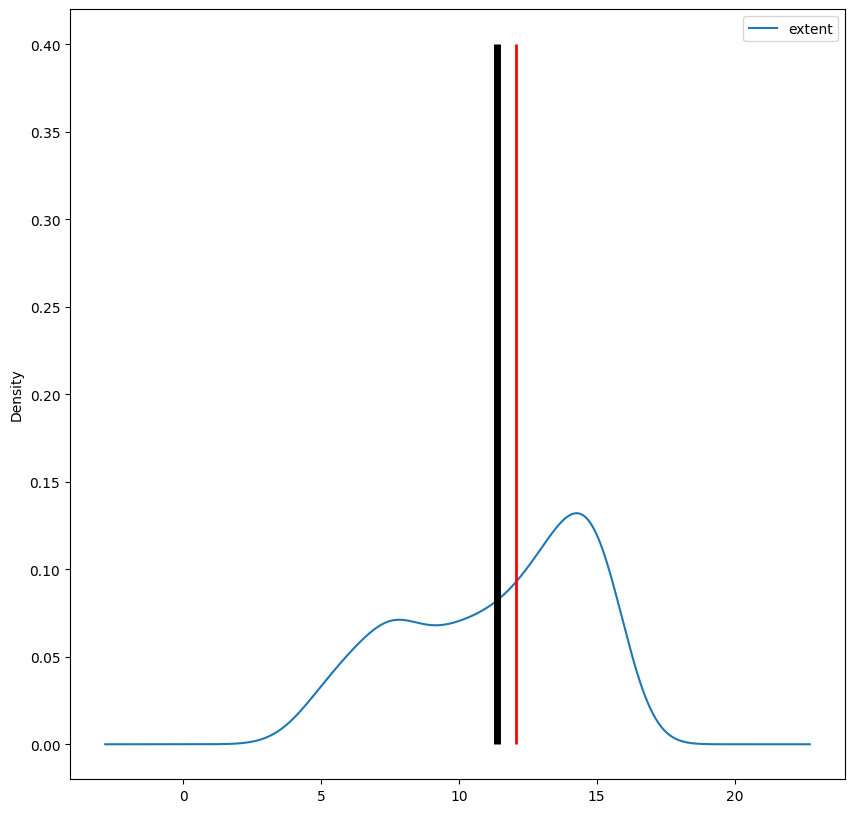

In [16]:
# Density plot to investigate center of distribution

df_extent_n_dist = pd.DataFrame(data_north,columns=['extent'])
df_extent_n_dist.plot(kind="density",
              figsize=(10,10));

plt.vlines(df_extent_n_dist.mean(),     # Plot black line at mean
           ymin=0, 
           ymax=0.4,
           linewidth=5.0,
           color="black"
          );

plt.vlines(df_extent_n_dist.median(),   # Plot red line at median
           ymin=0, 
           ymax=0.4, 
           linewidth=2.0,
           color="red");

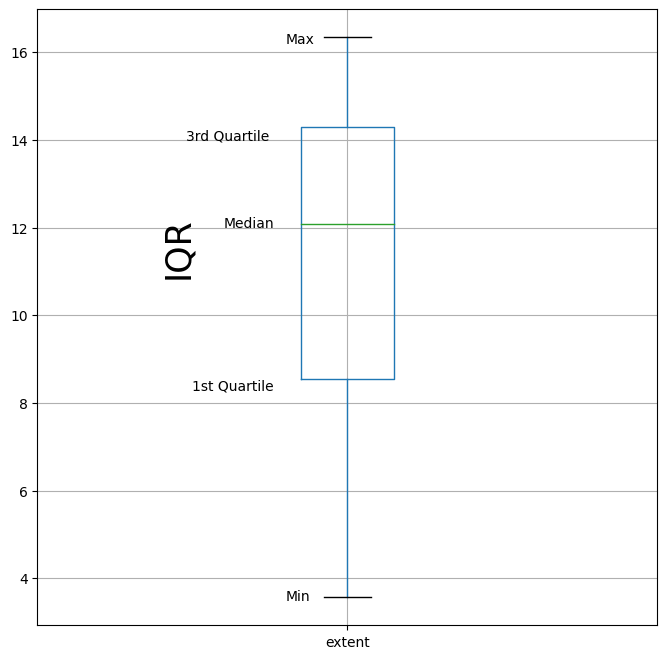

In [17]:
### Measures of spread ###
# Interquartile (IQR) range is another common measure of spread. 
# IQR is the distance between the 3rd quartile and the 1st quartile

df_extent_n_box = pd.DataFrame(data_north,columns=['extent','area'])

df_extent_n_box.boxplot(column=["extent"],
               return_type='axes',
               figsize=(8,8))

plt.text(x=0.74, y=14, s="3rd Quartile")
plt.text(x=0.8, y=12, s="Median")
plt.text(x=0.75, y=8.3, s="1st Quartile")
plt.text(x=0.9, y=3.5, s="Min")
plt.text(x=0.9, y=16.2, s="Max")
plt.text(x=0.7, y=11, s="IQR", rotation=90, size=25);

In [18]:
# Kurtosis and Skewness

extent_n_skew = df_extent_n_box["extent"].skew()
area_n_skew = df_extent_n_box["area"].skew()
extent_n_kurt = df_extent_n_box["extent"].kurt()
area_n_kurt = df_extent_n_box["area"].kurt()

print("Skewness Extent: %s \nKurtosis Extent: %s" %(extent_n_skew,extent_n_kurt))
print()
print("Skewness Area: %s \nKurtosis Area: %s" %(area_n_skew,area_n_kurt))

Skewness Extent: -0.43984676649195636 
Kurtosis Extent: -1.015064340679889

Skewness Area: -0.4023450626866869 
Kurtosis Area: -1.3134986245117097


<Axes: xlabel='month', ylabel='extent'>

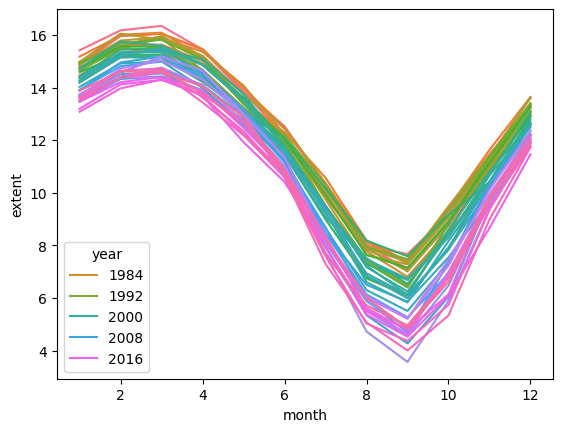

In [20]:
# Monthly sea ice extent throughout the years plot

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

df_extent_n_plot = pd.DataFrame(data_north,columns=['extent','year','month'])
sns.lineplot(data=df_extent_n_plot, x="month", y="extent", hue="year",palette= "husl")

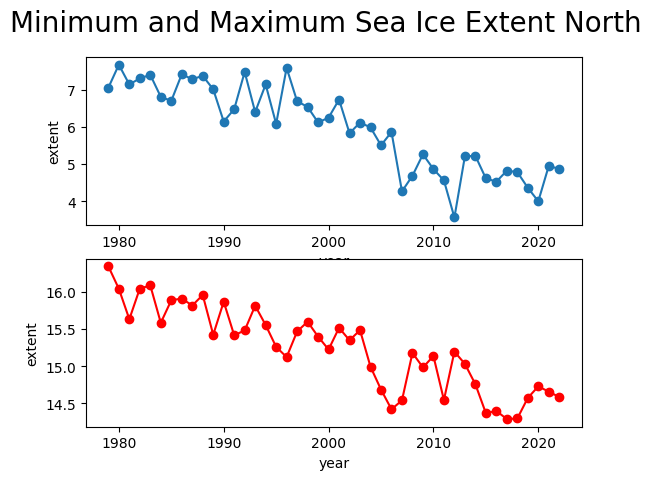

In [21]:
# Minimum and Maximum Sea Ice extent Plot

df_extent_n_plot = pd.DataFrame(data_north,columns=['extent','year','month'])
df_extent_n_min = df_extent_n_plot.loc[(df_extent_n_plot['month']==9)]
df_extent_n_max = df_extent_n_plot.loc[(df_extent_n_plot['month']==3)]

fig, axs = plt.subplots(2)
fig.suptitle('Minimum and Maximum Sea Ice Extent North', fontsize=20)
axs[0].plot(df_extent_n_min['year'], df_extent_n_min['extent'],marker='o')
axs[1].plot(df_extent_n_max['year'], df_extent_n_max['extent'], color='red', marker='o')
for ax in axs.flat:
    ax.set(xlabel='year', ylabel='extent')


## Level 1 Descriptive Statistics South

In [22]:
### Measures of center ###

df_south = pd.DataFrame(data_south,columns=['extent','area'])
df_south.describe()

,extent,area
count,529.000000,529.000000
mean,11.547026,8.755280
std,5.593109,4.603782
min,2.159000,1.346000
25%,5.838000,4.073000
50%,11.981000,9.209000
75%,16.974000,13.380000
max,19.756000,15.750000


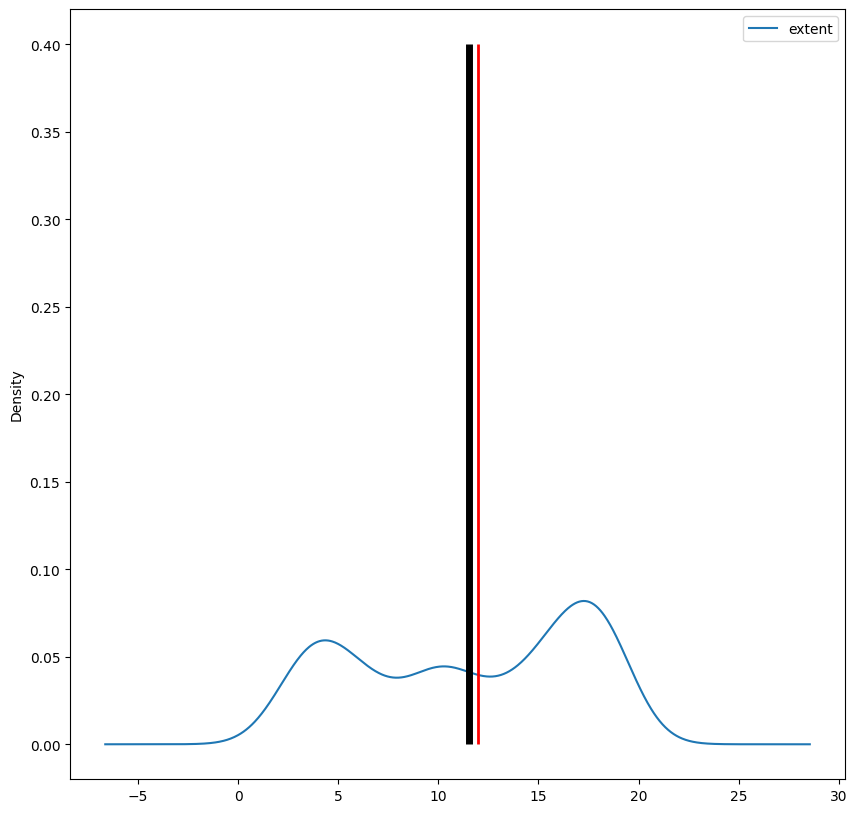

In [23]:
# Density plot to investigate center of distribution

df_extent_s_dist = pd.DataFrame(data_south,columns=['extent'])
df_extent_s_dist.plot(kind="density",
              figsize=(10,10));

plt.vlines(df_extent_s_dist.mean(),     # Plot black line at mean
           ymin=0, 
           ymax=0.4,
           linewidth=5.0,
           color="black"
          );

plt.vlines(df_extent_s_dist.median(),   # Plot red line at median
           ymin=0, 
           ymax=0.4, 
           linewidth=2.0,
           color="red");

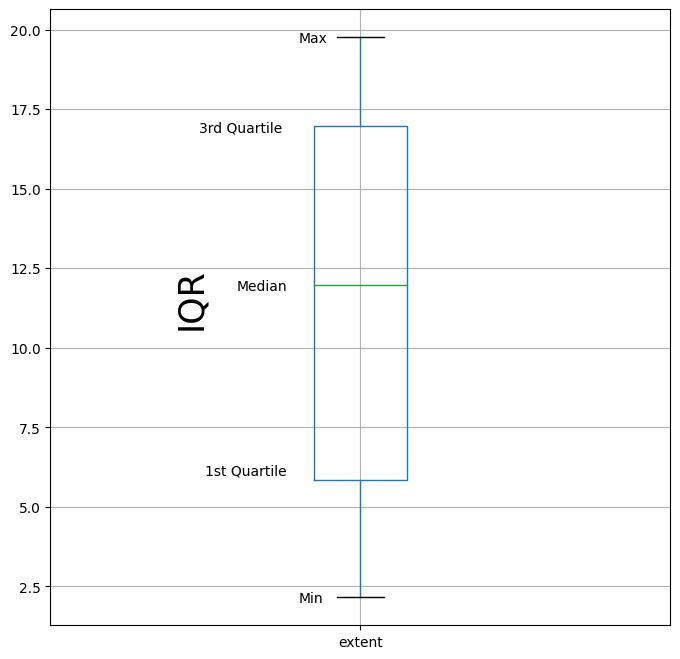

In [26]:
### Measures of spread ###
# Interquartile (IQR) range is another common measure of spread. 
# IQR is the distance between the 3rd quartile and the 1st quartile

df_extent_s_box = pd.DataFrame(data_south,columns=['extent','area'])

df_extent_s_box.boxplot(column=["extent"],
               return_type='axes',
               figsize=(8,8))

plt.text(x=0.74, y=16.8, s="3rd Quartile")
plt.text(x=0.8, y=11.8, s="Median")
plt.text(x=0.75, y=6, s="1st Quartile")
plt.text(x=0.9, y=2.0, s="Min")
plt.text(x=0.9, y=19.6, s="Max")
plt.text(x=0.7, y=10.8, s="IQR", rotation=90, size=25);

In [27]:
# Kurtosis and Skewness

extent_s_skew = df_extent_s_box["extent"].skew()
area_s_skew = df_extent_s_box["area"].skew()
extent_s_kurt = df_extent_s_box["extent"].kurt()
area_s_kurt = df_extent_s_box["area"].kurt()

print("Skewness Extent: %s \nKurtosis Extent: %s" %(extent_s_skew,extent_s_kurt))
print()
print("Skewness Area: %s \nKurtosis Area: %s" %(area_s_skew,area_s_kurt))

Skewness Extent: -0.2091186799587056 
Kurtosis Extent: -1.4677397736148166

Skewness Area: -0.1524244928553591 
Kurtosis Area: -1.503765721661086


<Axes: xlabel='month', ylabel='extent'>

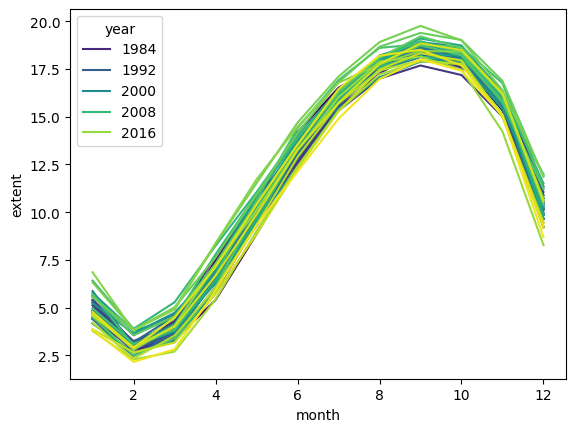

In [28]:
# Monthly sea ice extent throughout the years 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

df_extent_s_plot = pd.DataFrame(data_south,columns=['extent','year','month'])

sns.lineplot(data=df_extent_s_plot, x="month", y="extent", hue="year",palette= 'viridis')

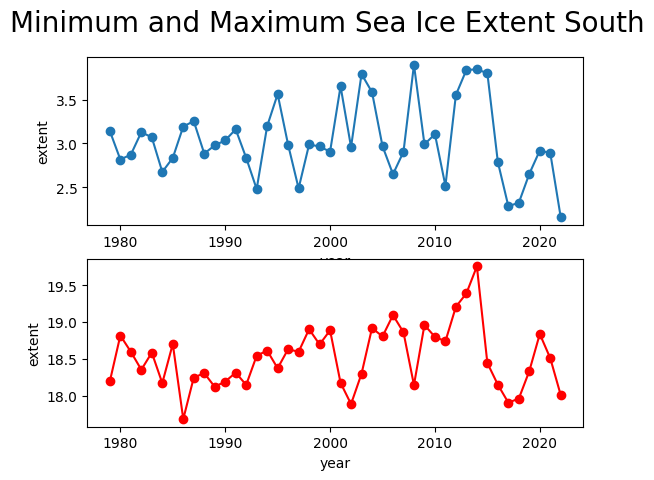

In [29]:
# Minimum and Maximum sea ice extent plot

df_extent_s_max = df_extent_s_plot.loc[(df_extent_s_plot['month']==9)]
df_extent_s_min = df_extent_s_plot.loc[(df_extent_s_plot['month']==2)]

fig, axs = plt.subplots(2)
fig.suptitle('Minimum and Maximum Sea Ice Extent South', fontsize=20)
axs[0].plot(df_extent_s_min['year'], df_extent_s_min['extent'],marker='o')
axs[1].plot(df_extent_s_max['year'], df_extent_s_max['extent'], color='red', marker='o')
for ax in axs.flat:
    ax.set(xlabel='year', ylabel='extent')

## Level 2 Inferential statistics 

### T-Test

In [30]:
# T-test two sample North
# Null hypothesis (H0): There is no significant difference in the mean ice extent loss between the first half of the 
# time period and the second half of the time period.
# Alternative hypothesis (Ha): There is a significant difference in the mean ice extent loss between the first half 
# of the time period and the second half of the time period.
import numpy as np

start_date = 1980
middle_date = 2001
end_date = 2022

df_extent_north = pd.DataFrame(data_north)

# Select DataFrame rows between two dates for the first period
first_period_north = (df_extent_north['year'] > start_date) & (df_extent_north['year'] <= middle_date)
df_first_north = df_extent_north.loc[first_period_north]

# Select DataFrame rows between two dates for the second period
second_period_north = (df_extent_north['year'] > middle_date) & (df_extent_north['year'] <= end_date)
df_second_north = df_extent_north.loc[second_period_north]

# Create df for extent
df_first_extent_north = df_first_north['extent']
df_second_extent_north = df_second_north['extent']

extent_by_period = pd.DataFrame({'first_p':df_first_extent_north,'second_p':df_second_extent_north})
extent_by_period.describe()

# Create t-test for groups
t2,p = stats.ttest_rel(a = df_first_extent_north, b = df_second_extent_north)

#two-tail 2-sample t-test
alpha_half = 0.005 #alpha is 0.01 or level of confidence is 99%

print("p value = {:g}".format(p))
print("t value = {:g}". format(t2))

if p < alpha_half:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis is accepted")
    
# This is a test for the null hypothesis that two related or repeated samples have identical average (expected) values.

p value = 1.94413e-92
t value = 32.6902
The null hypothesis can be rejected


In [31]:
# T-test two sample South
# Null hypothesis (H0): There is no significant difference in the mean ice extent loss between the first half of the 
# time period and the second half of the time period.
# Alternative hypothesis (Ha): There is a significant difference in the mean ice extent loss between the first half 
# of the time period and the second half of the time period.

import numpy as np

start_date = 1980
middle_date = 2001
end_date = 2022

df_extent_south = pd.DataFrame(data_south)

# Select DataFrame rows between two dates for the first period
first_period_south = (df_extent_south['year'] > start_date) & (df_extent_south['year'] <= middle_date)
df_first_south = df_extent_south.loc[first_period_south]

# Select DataFrame rows between two dates for the second period
second_period_south = (df_extent_south['year'] > middle_date) & (df_extent_south['year'] <= end_date)
df_second_south = df_extent_south.loc[second_period_south]

# Create df for extent
df_first_extent_south = df_first_south['extent']
df_second_extent_south = df_second_south['extent']

extent_by_period = pd.DataFrame({'first_p':df_first_extent_south,'second_p':df_second_extent_south})
extent_by_period.describe()

# Create t-test for groups
t2,p = stats.ttest_rel(a = df_first_extent_south, b = df_second_extent_south)

#two-tail 2-sample t-test
alpha_half = 0.005 #alpha is 0.01 or level of confidence is 99%

print("p value = {:g}".format(p))
print("t value = {:g}". format(t2))

if p < alpha_half:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis is accepted")
    
# This is a test for the null hypothesis that two related or repeated samples have identical average (expected) values.

p value = 0.00955059
t value = -2.61175
The null hypothesis is accepted


### ANOVA

F Value  = 112.615 
P Value  = 1.31667e-51 
The null hypothesis can be rejected


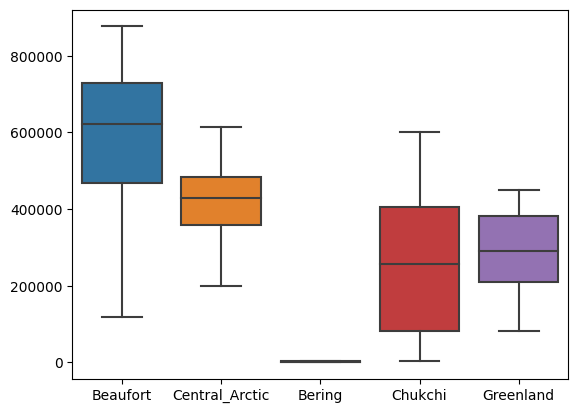

In [33]:
# One-Way ANOVA: Test whether there's a significative difference between the minimum sea ice extent of 4 regions of the Arctic
# Ho: All the means of the minimum sea ice extent of the different regions are the same
# Hi: At least one mean differs from the rest

import scipy.stats as stats

# Load dataset
data_regional = pd.read_excel('regional_extent_sept.xlsx')

# Create groups
beaufort = data_regional['Beaufort']
bering = data_regional['Bering']
central_arctic = data_regional['Central_Arctic']
chukchi = data_regional['Chukchi']
greenland = data_regional['Greenland']

sns.boxplot(data=data_regional[['Beaufort', 'Central_Arctic', 'Bering', 'Chukchi', 'Greenland']])

fvalue, pvalue = stats.f_oneway(beaufort, central_arctic, bering, chukchi, greenland)

print("F Value  = {:g} ".format(fvalue))
print("P Value  = {:g} ".format(pvalue))

alpha = 0.01

if pvalue < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis is accepted")

### Jan Mayen Greenland weather data and regional Greenland extent & area

### Correlation and Heatmap

,DP01,DP10,DT32,DX32,EMNT,EMXP,EMXT,HDSD,HTDD,PRCP,TAVG,TMAX,TMIN,extent_greenland,area_greenland
DP01,1.000000,0.733564,0.317802,0.303444,-0.372724,0.318298,-0.330933,-0.225404,0.331525,0.689127,-0.325868,-0.320822,-0.328228,-0.028278,0.040692
DP10,0.733564,1.000000,0.132104,0.065626,-0.175276,0.414708,-0.142798,-0.232422,0.120685,0.853333,-0.113417,-0.102435,-0.121906,-0.104554,-0.059772
DT32,0.317802,0.132104,1.000000,0.866455,-0.878807,-0.051183,-0.818493,0.520744,0.936639,0.059439,-0.936060,-0.942019,-0.924361,0.714640,0.806998
DX32,0.303444,0.065626,0.866455,1.000000,-0.868809,-0.047529,-0.775500,0.374616,0.924452,0.028011,-0.926630,-0.927430,-0.919794,0.676723,0.745597
EMNT,-0.372724,-0.175276,-0.878807,-0.868809,1.000000,0.042460,0.783156,-0.414468,-0.945703,-0.089415,0.955102,0.941806,0.960135,-0.728061,-0.797457
EMXP,0.318298,0.414708,-0.051183,-0.047529,0.042460,1.000000,0.044256,-0.241145,-0.057888,0.735397,0.059042,0.059304,0.058410,-0.217269,-0.191268
EMXT,-0.330933,-0.142798,-0.818493,-0.775500,0.783156,0.044256,1.000000,-0.424232,-0.823131,-0.077502,0.838353,0.861502,0.813495,-0.613740,-0.695937
HDSD,-0.225404,-0.232422,0.520744,0.374616,-0.414468,-0.241145,-0.424232,1.000000,0.480101,-0.305285,-0.496923,-0.506529,-0.484878,0.739831,0.747393
HTDD,0.331525,0.120685,0.936639,0.924452,-0.945703,-0.057888,-0.823131,0.480101,1.000000,0.051034,-0.990056,-0.985698,-0.987000,0.758245,0.829208
PRCP,0.689127,0.853333,0.059439,0.028011,-0.089415,0.735397,-0.077502,-0.305285,0.051034,1.000000,-0.044122,-0.037374,-0.049597,-0.201496,-0.156929


<Axes: >

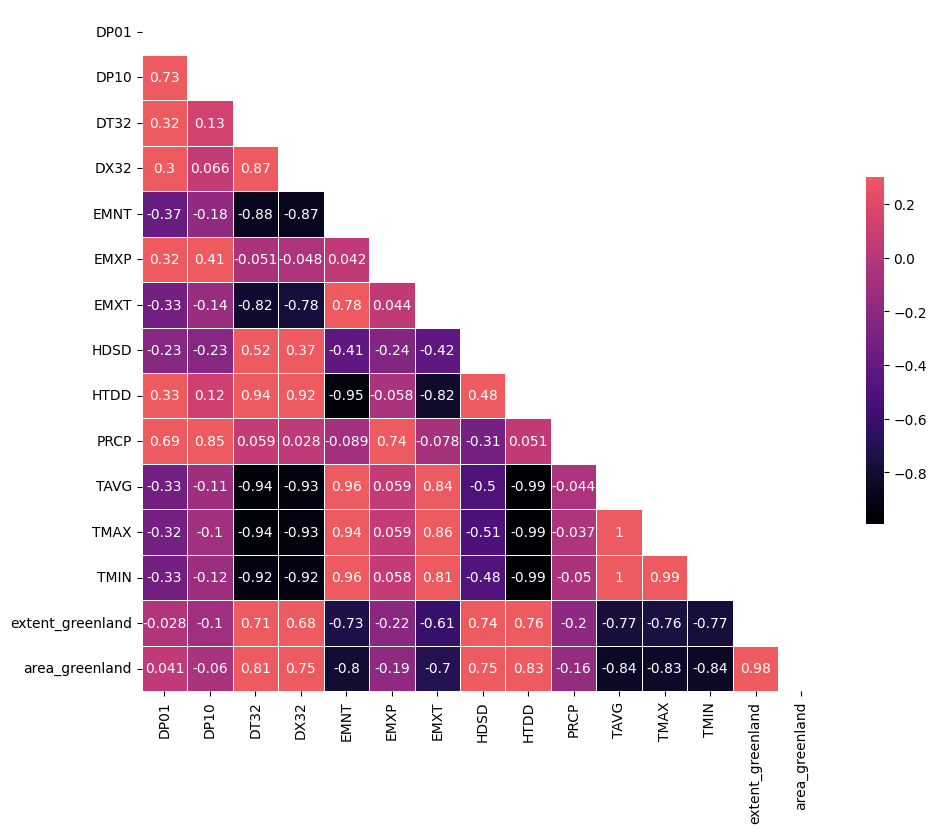

In [34]:
# Heatmap
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#loading the data
data = pd.read_csv('jnm_weather_station.csv')

# Remove Date column
df_heatmap = data.drop(['DATE','ELEVATION','LATITUDE','LONGITUDE','NAME','STATION'], axis=1)

# Compute the correlation matrix
corr = df_heatmap.corr()
display(corr)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.color_palette("magma", as_cmap=True)#sns.diverging_palette(230, 20, as_cmap=True)


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)

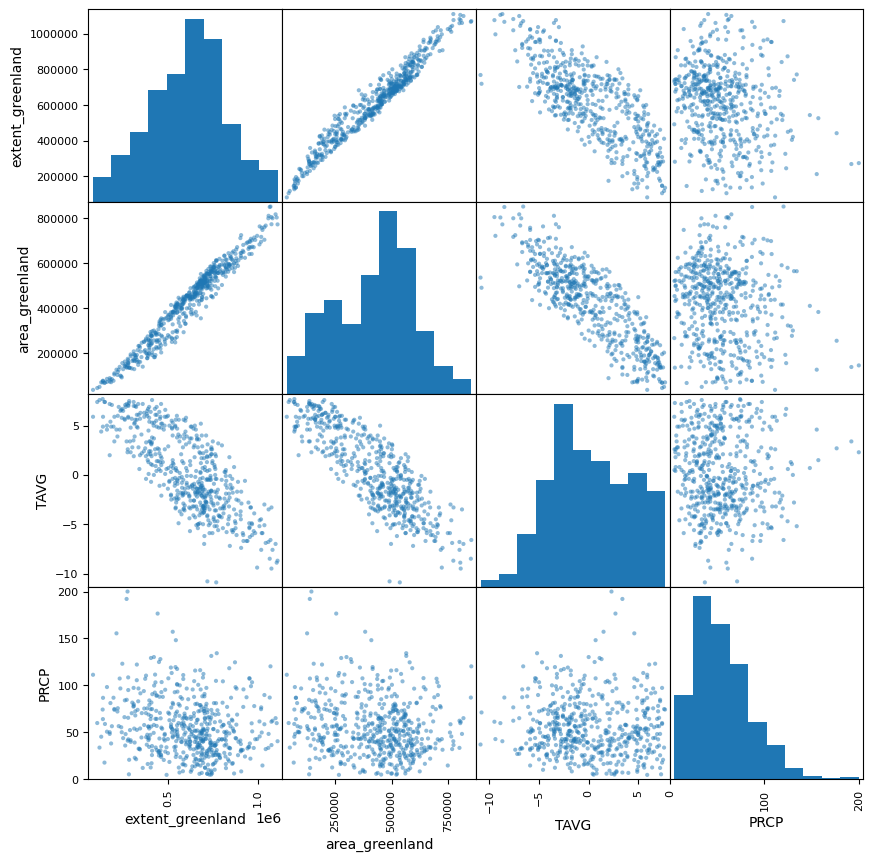

In [35]:
# Scatter Matrix of TAVG and Greenland Sea Ice extent
df_data = pd.DataFrame(data, columns=['extent_greenland','area_greenland','TAVG','PRCP'])
pd.plotting.scatter_matrix(df_data,figsize=(10,10))
plt.show()

## Level 3 Machine Learning

### Regression Models Greenland sea ice extent and Avg Temperature

In [36]:
import numpy as np 
import pandas as pd 
import requests, io
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Loading the data
data = pd.read_csv('jnm_weather_station.csv')

# Remove unnecessary columns
data = data.drop(['DATE','ELEVATION','LATITUDE','LONGITUDE','NAME','STATION','area_greenland'], axis=1)

# Normalize data using MinMax Scaler
scaler = MinMaxScaler()
data_norm = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

# Separating the features and the target variable
x = data_norm['TAVG'].values.reshape(-1, 1) # Predictor
y = data_norm['extent_greenland']  # Target

# Splitting the dataset into training and testing set (80/20)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle= False)

#### Random Forest

In [37]:
from sklearn.ensemble import RandomForestRegressor

# Initializing the Random Forest Regression model with 100 decision trees
model_rf = RandomForestRegressor(n_estimators = 100, random_state = 0)

# Fitting the Random Forest Regression model to the data
model_rf.fit(x_train, y_train)

# Predicting the target values of the test set
y_pred_rf = model_rf.predict(x_test)

# Evaluation Metrics
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("R2: %s" %r2_rf)
print("MSE: %s" % mse_rf)

R2: 0.3303537118440255
MSE: 0.019954532406946477


#### Linear Regression

In [38]:
from sklearn.linear_model import LinearRegression

# creating a LinearRegression model
model_lr = LinearRegression()

# fitting the training data
model_lr.fit(x_train,y_train)

# Predicting the target values of the test set
y_pred_lr =  model_lr.predict(x_test)

# Evaluation Metrics
r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print("R2: %s" %r2_lr)
print("MSE: %s" % mse_lr)

R2: 0.446940956414568
MSE: 0.01648039390850742


#### Support Vector

In [39]:
from sklearn.svm import SVR

# Create SVR Model
model_svr = SVR(kernel='rbf', C=1e3, gamma=0.1)

# Fit the SVR model using the training data
model_svr.fit(x_train, y_train)

# Predicting the target values of the test set
y_pred_svr = model_svr.predict(x_test)

# Evaluation Metrics
r2_svr = r2_score(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
print("R2: %s" %r2_svr)
print("MSE: %s" % mse_svr)

R2: 0.4371270418073777
MSE: 0.016772834978564646


#### Gradient Boost

In [40]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression

# Create Gradient Boosting model
model_gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)

# Fit the model using the training data
model_gb.fit(x_train, y_train)

# Evaluate the model on the test data
y_pred_gb = model_gb.predict(x_test)

# Evaluation Metrics
r2_gb = r2_score(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
print("R2: %s" %r2_gb)
print("MSE: %s" % mse_gb)

R2: 0.42629962259147924
MSE: 0.017095477082983986


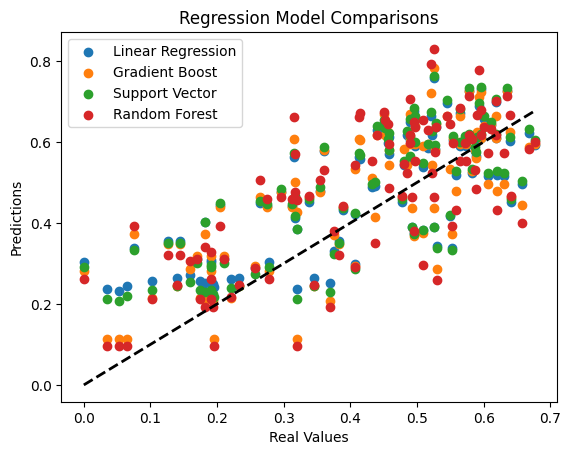

In [41]:
import matplotlib.pyplot as plt

# Plot the predicted values against the true values
plt.scatter(y_test, y_pred_lr,label='Linear Regression')
plt.scatter(y_test, y_pred_gb,label='Gradient Boost')
plt.scatter(y_test, y_pred_svr, label='Support Vector')
plt.scatter(y_test, y_pred_rf,label='Random Forest')

# Add a regression line to the plot
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--k', linewidth=2)

# Set the x- and y-axis labels and the plot title
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Gradient Boosting Regressor Model')

# Set the x- and y-axis labels and the plot title
plt.xlabel('Real Values')
plt.ylabel('Predictions')
plt.title('Regression Model Comparisons')

# Add a legend to the plot
plt.legend(loc='upper left')

# Show the plot
plt.show()

###  Arctic Time series forecasting

### SARIMA

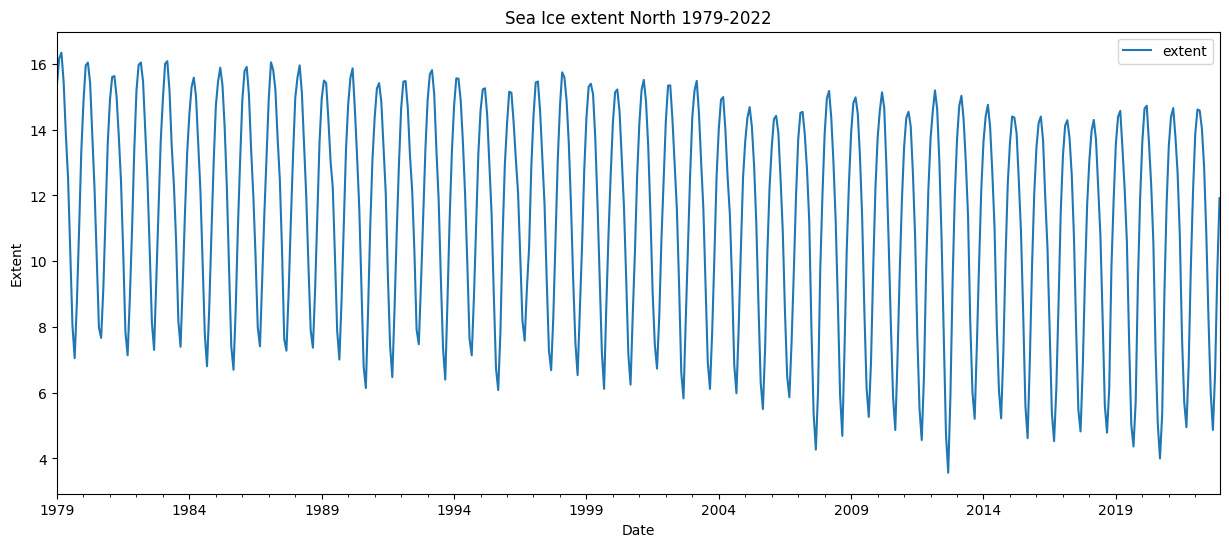

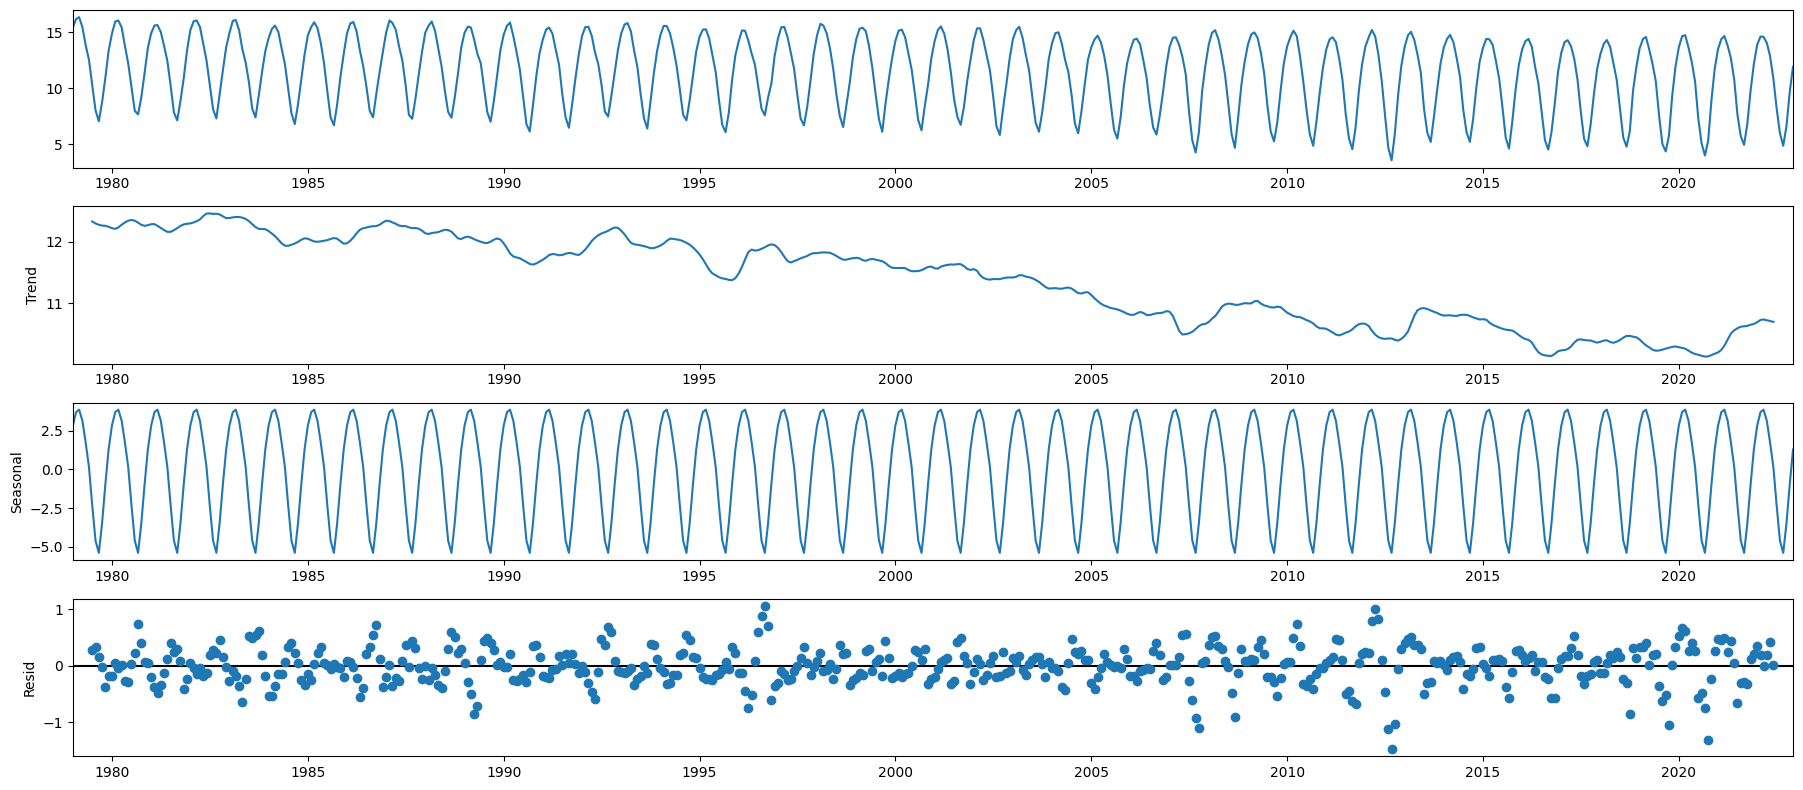

In [42]:
from pmdarima import auto_arima
from pylab import rcParams
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
data_time_series_sar = pd.read_excel('time_series_north_extent.xlsx',index_col=0)
 
# Convert to date time format
data_time_series_sar.index = pd.to_datetime(data_time_series_sar.index)

# Plot Sea Ice extent
data_time_series_sar.plot(figsize=(15, 6))
plt.gca().set(title="Sea Ice extent North 1979-2022", xlabel="Date", ylabel="Extent")
plt.show()

# Plot Seasonal decomposition: We can clearly see a seasonal pattern in the data as the extent tends to reach its 
# minimum in September and its maximum during the month of March

rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(data_time_series_sar, model='additive')
fig = decomposition.plot()
plt.show()

In [43]:
from sklearn.model_selection import train_test_split

# Training and Test datasets
train_sar, val_sar = train_test_split(data_time_series_sar, test_size=0.2,shuffle=False)

# SARIMA MODEL
model = auto_arima(data_time_series_sar['extent'], start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=1, seasonal= True)
auto_arima(data_time_series_sar['extent'], start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=1, seasonal= True).summary()

print("ARIMA order:", model.order)
print("Seasonal order:", model.seasonal_order)

# Predictions
sarima_result = model.fit(train_sar)
#arima_result.summary()
prediction_sar = sarima_result.predict(n_periods=len(val_sar)).rename('SARIMA')

ARIMA order: (1, 0, 1)
Seasonal order: (0, 1, 1, 12)


In [44]:
# Plot Forecast vs Validation values
import plotly.graph_objects as go 

prediction_sar_df = pd.DataFrame(prediction_sar,columns=['SARIMA'])
prediction_sar_df.reset_index(inplace=True)
prediction_sar_df = prediction_sar_df.rename(columns={'index':'DATE'})

train_sar_plot = train_sar
train_sar_plot.reset_index(inplace=True)

val_sar_plot = val_sar
val_sar_plot.reset_index(inplace=True)

fig = go.Figure()
fig.add_trace(go.Scatter(x=train_sar_plot['DATE'],y=train_sar_plot['extent'],name='Train'))
fig.add_trace(go.Scatter(x=val_sar_plot['DATE'],y=val_sar_plot['extent'],name='Validation'))
fig.add_trace(go.Scatter(x=prediction_sar_df['DATE'],y=prediction_sar_df['SARIMA'],name='Prediction'))
fig.update_layout(title='Sea Ice Extent Forecast - SARIMA',xaxis_title='Date',yaxis_title='Extent')
fig.show()


In [45]:
# Evaluation Metrics

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

print("R2 score: %s" %r2_score(val_sar['extent'],prediction_sar_df['SARIMA']))
print("Mean Absolute Error: %s" %mean_absolute_error(val_sar['extent'],prediction_sar_df['SARIMA']))
print("Mean Absolute Percentage Error: %s" %mean_absolute_percentage_error(val_sar['extent'],prediction_sar_df['SARIMA']))
print("MSE: %s" %mean_squared_error(val_sar['extent'],prediction_sar_df['SARIMA']))
print("RMSE: %s" %mean_squared_error(val_sar['extent'],prediction_sar_df['SARIMA'], squared=False))

R2 score: 0.9881495167432882
Mean Absolute Error: 0.30038688707247
Mean Absolute Percentage Error: 0.03521925119921888
MSE: 0.1382565217211703
RMSE: 0.3718286187495125


### Prophet

In [46]:
import pandas as pd
from prophet import Prophet
from sklearn.model_selection import train_test_split
from prophet.plot import plot_plotly, plot_components_plotly 

# load dataset
data_time_series_pr = pd.read_excel('time_series_north_extent.xlsx')

# Convert to date time format
data_time_series_pr['DATE'] = pd.to_datetime(data_time_series_pr['DATE'])

# Checking datatype again to see if the data type is time series now
print(type(data_time_series_pr.DATE[0]))

# Set indexing to timestamp
data_time_series_pr.sort_values(by='DATE')

# Rename columns (Prophet requirement)
data_time_series_pr = data_time_series_pr.rename(columns={'DATE': 'ds','extent': 'y'})

# Training and Test datasets
train_pr, val_pr = train_test_split(data_time_series_pr, test_size=0.2,shuffle=False)

# Fit model
m = Prophet(seasonality_mode='additive')
m.fit(train_pr)

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


13:40:48 - cmdstanpy - INFO - Chain [1] start processing
13:40:49 - cmdstanpy - INFO - Chain [1] done processing


In [47]:
# Create dataframe for future dates to predict and show the forecast

future = m.make_future_dataframe(periods=len(val_pr),include_history=False,freq='M')
forecast=m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
101,2022-07-31,10.082437,5.109683,6.055764,9.983874,10.181000,-4.481673,-4.481673,-4.481673,-4.481673,-4.481673,-4.481673,0.0,0.0,0.0,5.600764
102,2022-08-31,10.078007,4.313625,5.220848,9.978053,10.178616,-5.339815,-5.339815,-5.339815,-5.339815,-5.339815,-5.339815,0.0,0.0,0.0,4.738192
103,2022-09-30,10.073719,6.163024,7.142683,9.972340,10.176158,-3.419563,-3.419563,-3.419563,-3.419563,-3.419563,-3.419563,0.0,0.0,0.0,6.654156
104,2022-10-31,10.069289,8.812693,9.732848,9.966220,10.173900,-0.817628,-0.817628,-0.817628,-0.817628,-0.817628,-0.817628,0.0,0.0,0.0,9.251660
105,2022-11-30,10.065001,10.698408,11.661148,9.959875,10.171634,1.131885,1.131885,1.131885,1.131885,1.131885,1.131885,0.0,0.0,0.0,11.196886


In [48]:
# Plot Forecast 

plot_plotly(m,forecast)

In [49]:
# Plot Forecast vs Validation values
import plotly.graph_objects as go 

fig = go.Figure()
fig.add_trace(go.Scatter(x=train_pr['ds'],y=train_pr['y'],name='Train'))
fig.add_trace(go.Scatter(x=val_pr['ds'],y=val_pr['y'],name='Validation'))
fig.add_trace(go.Scatter(x=forecast['ds'],y=forecast['yhat'],name='Prediction'))
fig.update_layout(title='Sea Ice Extent Forecast - Prophet',xaxis_title='Date',yaxis_title='Extent')
fig.show()

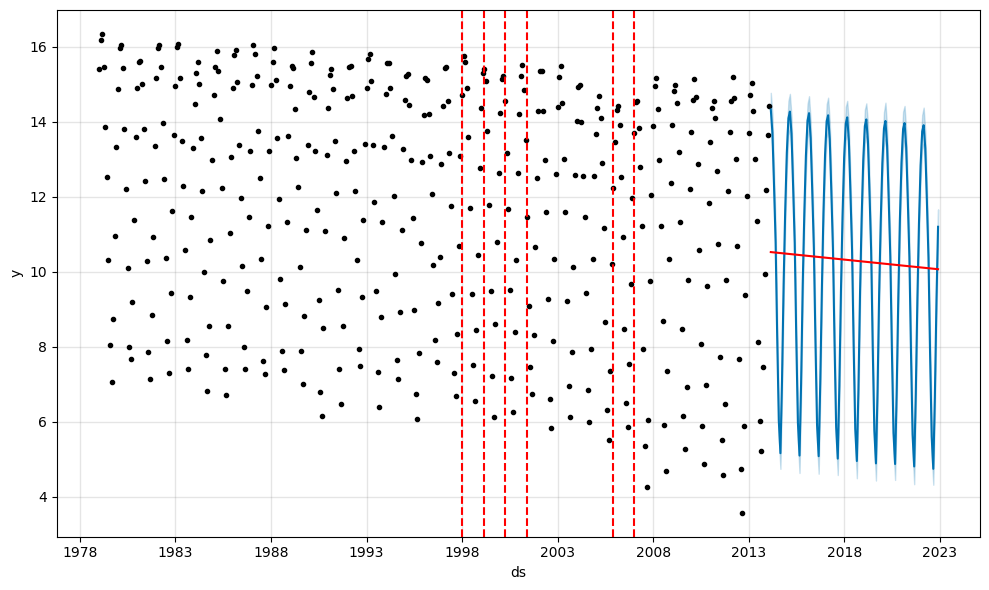

In [50]:
# track changes in the trend line

from prophet.plot import add_changepoints_to_plot
fig=m.plot(forecast)
a=add_changepoints_to_plot(fig.gca(),m,forecast)

In [51]:
# Evaluation Metrics

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

print("R2 score: %s" %r2_score(val_pr['y'],forecast['yhat']))
print("Mean Absolute Error: %s" %mean_absolute_error(val_pr['y'],forecast['yhat']))
print("Mean Absolute Percentage Error: %s" %mean_absolute_percentage_error(val_pr['y'],forecast['yhat']))
print("MSE: %s" %mean_squared_error(val_pr['y'],forecast['yhat']))
print("RMSE: %s" %mean_squared_error(val_pr['y'], forecast['yhat'],squared=False))

R2 score: 0.9802818079921453
Mean Absolute Error: 0.3852601556143248
Mean Absolute Percentage Error: 0.043723926785703936
MSE: 0.23004704386988994
RMSE: 0.47963219644837224


### Holt-Winters Exponential Smoothing

In [52]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load Dataset
data_time_series_hw = pd.read_excel('time_series_north_extent.xlsx',index_col=0)

# Convert to date time format
data_time_series_hw.index = pd.to_datetime(data_time_series_hw.index)

# Training and Test datasets
train_hw, val_hw = train_test_split(data_time_series_hw, test_size=0.2,shuffle=False)

# Create model and make predictions
fitted_model = ExponentialSmoothing(train_hw['extent'],seasonal="mul").fit()
test_predictions = fitted_model.predict(start='2014-03-01',end='2022-12-01')

c:\Users\sofia\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [53]:
# Plot Forecast vs Validation values
import plotly.graph_objects as go 

prediction_hw_df = pd.DataFrame(test_predictions,columns=['HW'])
prediction_hw_df.reset_index(inplace=True)
prediction_hw_df = prediction_hw_df.rename(columns={'index':'DATE'})

train_hw_plot = train_hw
train_hw_plot.reset_index(inplace=True)

val_hw_plot = val_hw
val_hw_plot.reset_index(inplace=True)

fig = go.Figure()
fig.add_trace(go.Scatter(x=train_hw_plot['DATE'],y=train_hw_plot['extent'],name='Train'))
fig.add_trace(go.Scatter(x=val_hw_plot['DATE'],y=val_hw_plot['extent'],name='Validation'))
fig.add_trace(go.Scatter(x=prediction_hw_df['DATE'],y=prediction_hw_df['HW'],name='Prediction'))
fig.update_layout(title='Sea Ice Extent Forecast - Holt-Winters',xaxis_title='Date',yaxis_title='Extent')
fig.show()

In [54]:
# Evaluation Metrics

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

print("R2 score: %s" %r2_score(val_hw['extent'],test_predictions))
print("Mean Absolute Error: %s" %mean_absolute_error(val_hw['extent'],test_predictions))
print("Mean Absolute Percentage Error: %s" %mean_absolute_percentage_error(val_hw['extent'],test_predictions))
print("MSE: %s" %mean_squared_error(val_hw['extent'],test_predictions))
print("RMSE: %s" %mean_squared_error(val_hw['extent'],test_predictions, squared=False))

R2 score: 0.971588367211496
Mean Absolute Error: 0.46839856023714865
Mean Absolute Percentage Error: 0.0524947735838307
MSE: 0.33147116794017195
RMSE: 0.575735328028576


## Level 4 Deep Learning

### NeuralProphet

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from neuralprophet import NeuralProphet

# load dataset
data_time_series_npr = pd.read_excel('time_series_north_extent.xlsx')

# Convert to date time format
data_time_series_npr['DATE'] = pd.to_datetime(data_time_series_npr['DATE'])

# Checking datatype again to see if the data type is time series now
print(type(data_time_series_npr.DATE[0]))

# Set indexing to timestamp
data_time_series_npr.sort_values(by='DATE')

# Rename columns (NeuralProphet requirement)
data_time_series_npr = data_time_series_npr.rename(columns={'DATE': 'ds','extent': 'y'})

c:\Users\sofia\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\io\image.py:13: UserWarning:

Failed to load image Python extension: 'Could not find module 'C:\Users\sofia\AppData\Local\Programs\Python\Python39\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?

c:\Users\sofia\AppData\Local\Programs\Python\Python39\lib\site-packages\plotly_resampler\aggregation\aggregators.py:25: UserWarning:

Could not import lttbc; will use a (slower) python alternative.



<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [56]:
# Create model and fit it to the data, validation split 20%
m = NeuralProphet()
df_train, df_val = m.split_df(data_time_series_npr, freq='M', valid_p = 0.2)
metrics = m.fit(df_train, freq='M', validation_df=df_val)

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.811]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.764]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralP

Finding best initial lr:   0%|          | 0/217 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

In [57]:
metrics.tail()

,MAE_val,RMSE_val,Loss_val,RegLoss_val,epoch,MAE,RMSE,Loss,RegLoss
257,0.356200,0.451519,0.000706,0.0,257,0.271910,0.348250,0.000363,0.0
258,0.356137,0.451421,0.000705,0.0,258,0.271899,0.351831,0.000363,0.0
259,0.356338,0.451600,0.000706,0.0,259,0.271502,0.349248,0.000362,0.0
260,0.356378,0.451597,0.000706,0.0,260,0.272867,0.347069,0.000363,0.0
261,0.356365,0.451595,0.000706,0.0,261,0.272283,0.351325,0.000364,0.0


In [58]:
m.plot_parameters()

FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': '#2d92ff', 'width': 2},
              'mode': 'lines',
              'name': 'Trend',
              'type': 'scatter',
              'uid': '7421bf8b-28e1-4f2b-8a1d-322056f25936',
              'x': array([datetime.datetime(1979, 1, 1, 0, 0),
                          datetime.datetime(1979, 2, 1, 0, 0),
                          datetime.datetime(1979, 3, 1, 0, 0), ...,
                          datetime.datetime(2014, 1, 1, 0, 0),
                          datetime.datetime(2014, 2, 1, 0, 0),
                          datetime.datetime(2014, 3, 1, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([12.35357993, 12.35015814, 12.34706749, ..., 10.55614848, 10.5522049 ,
                          10.54864296]),
              'yaxis': 'y'},
             {'marker': {'color': '#2d92ff'},
              'name': 'Trend Rate Change',
              'type': 'bar',
              'uid': '2

In [59]:
# Create dataframe for forecasting 

future = m.make_future_dataframe(df_val,n_historic_predictions=True)
forecast = m.predict(df_val)
forecast

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.048]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.048]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.048]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


Predicting: 27it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y,yhat1,trend,season_yearly
0,2014-04-01,14.088,13.695725,10.544699,3.151026
1,2014-05-01,12.701,12.290556,10.540884,1.749673
2,2014-06-01,11.033,10.693986,10.536940,0.157046
3,2014-07-01,8.108,8.277369,10.533123,-2.255755
4,2014-08-01,6.078,6.006185,10.529180,-4.522995
...,...,...,...,...,...
100,2022-08-01,5.995,5.634470,10.157465,-4.522995
101,2022-09-01,4.869,4.804003,10.153522,-5.349519
102,2022-10-01,6.613,6.744517,10.149706,-3.405189
103,2022-11-01,9.712,9.208302,10.145761,-0.937460


In [60]:
m.plot(forecast)


FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': 'rgba(45, 146, 255, 1.0)', 'width': 2},
              'mode': 'lines',
              'name': 'yhat1',
              'type': 'scatter',
              'uid': '9e66c31c-6b44-4184-993a-0058540a1fbc',
              'x': array([datetime.datetime(2014, 4, 1, 0, 0),
                          datetime.datetime(2014, 5, 1, 0, 0),
                          datetime.datetime(2014, 6, 1, 0, 0),
                          datetime.datetime(2014, 7, 1, 0, 0),
                          datetime.datetime(2014, 8, 1, 0, 0),
                          datetime.datetime(2014, 9, 1, 0, 0),
                          datetime.datetime(2014, 10, 1, 0, 0),
                          datetime.datetime(2014, 11, 1, 0, 0),
                          datetime.datetime(2014, 12, 1, 0, 0),
                          datetime.datetime(2015, 1, 1, 0, 0),
                          datetime.datetime(2015, 2, 1, 0, 0),
                      

Text(0.5, 1.0, 'Model Loss (MAE)')

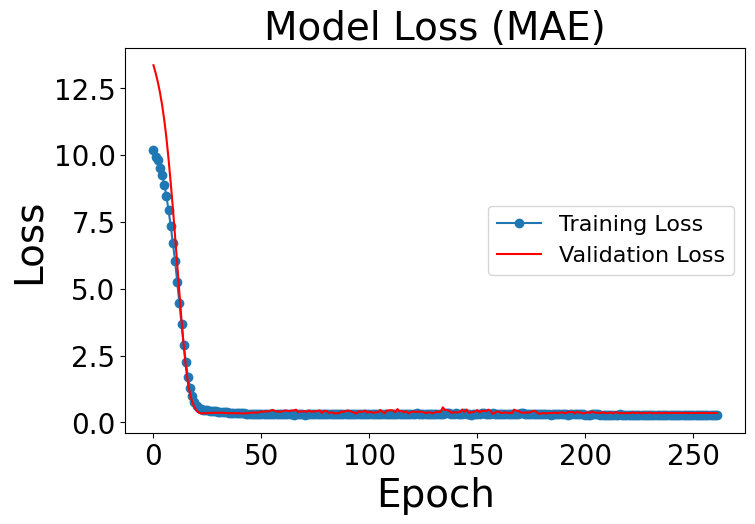

In [61]:
# Plot Model Loss
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(metrics["MAE"], '-o', label="Training Loss")  
ax.plot(metrics["MAE_val"], '-r', label="Validation Loss")
ax.legend(loc='center right', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel("Epoch", fontsize=28)
ax.set_ylabel("Loss", fontsize=28)
ax.set_title("Model Loss (MAE)", fontsize=28)

In [63]:
# Evaluation Metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

print("R2 score: %s" %r2_score(df_val['y'],forecast['yhat1']))
print("Mean Absolute Error: %s" %mean_absolute_error(df_val['y'],forecast['yhat1']))
print("Mean Absolute Percentage Error: %s" %mean_absolute_percentage_error(df_val['y'],forecast['yhat1']))
print("MSE: %s" %mean_squared_error(df_val['y'],forecast['yhat1']))
print("RMSE: %s" %mean_squared_error(df_val['y'],forecast['yhat1'], squared=False))


R2 score: 0.9824093043189681
Mean Absolute Error: 0.35636512585594543
Mean Absolute Percentage Error: 0.04233515321876637
MSE: 0.20393771187630114
RMSE: 0.45159463224921215


# Tests with Normalization 

## NeuralProphet

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.811]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.764]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.


<class 'pandas._libs.tslibs.timestamps.Timestamp'>


INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 262
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (27) is too small than the required number for the learning rate finder (217). The results might not be optimal.


Finding best initial lr:   0%|          | 0/217 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

,MAE_val,RMSE_val,Loss_val,RegLoss_val,epoch,MAE,RMSE,Loss,RegLoss
257,0.027996,0.035437,0.000710,0.0,257,0.021374,0.027473,0.000368,0.0
258,0.027955,0.035418,0.000709,0.0,258,0.021342,0.027323,0.000364,0.0
259,0.027943,0.035402,0.000708,0.0,259,0.021300,0.027701,0.000364,0.0
260,0.027943,0.035399,0.000708,0.0,260,0.021359,0.027718,0.000369,0.0
261,0.027941,0.035399,0.000708,0.0,261,0.021440,0.027902,0.000368,0.0


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.048]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.048]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.048]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


Predicting: 27it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\sofia\AppData\Local\Temp\ipykernel_10980\3305579898.py:55: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.




R2 score: 0.982357641129265
Mean Absolute Error: 0.02794124066356925
MSE: 0.001253087427667147
RMSE: 0.03539897495220938
Mean Absolute Percentage Error: 0.11319262916132791


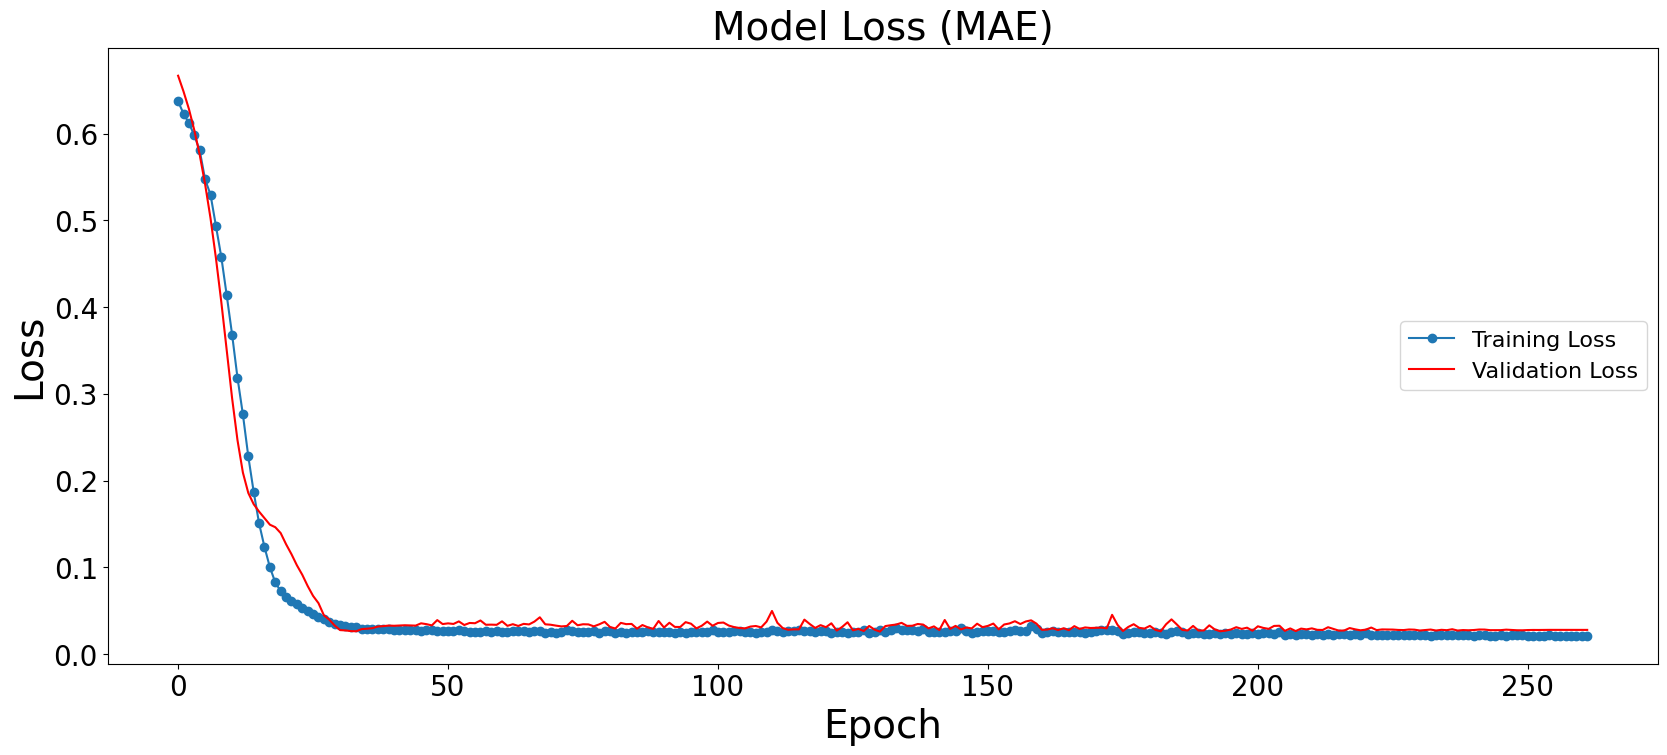

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from neuralprophet import NeuralProphet
from sklearn.preprocessing import MinMaxScaler

# load dataset
data_time_series_npr_norm = pd.read_excel('time_series_north_extent.xlsx')

# Normalize data
data = data_time_series_npr_norm['extent'].values.reshape(-1,1)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform data using the scaler
normalized_data = scaler.fit_transform(data)

normalized_data_df = pd.DataFrame(normalized_data,columns=['extent'])
data_time_series_npr_norm['extent'] = normalized_data_df['extent']

# Convert to date time format
data_time_series_npr_norm['DATE'] = pd.to_datetime(data_time_series_npr_norm['DATE'])

# Checking datatype again to see if the data type is time series now
print(type(data_time_series_npr_norm.DATE[0]))

# Set indexing to timestamp
data_time_series_npr_norm.sort_values(by='DATE')

# Rename columns (NeuralProphet requirement)
data_time_series_npr_norm = data_time_series_npr_norm.rename(columns={'DATE': 'ds','extent': 'y'})

# Create model 
m_norm = NeuralProphet()
df_train_norm, df_val_norm = m_norm.split_df(data_time_series_npr_norm, freq='M', valid_p = 0.2)
metrics_norm = m_norm.fit(df_train_norm, freq='M', validation_df=df_val_norm)

# Predict for the last 20% of the time series
display(metrics_norm.tail())
future_norm = m_norm.make_future_dataframe(df_val_norm,n_historic_predictions=True)
forecast_norm = m_norm.predict(df_val_norm)
m_norm.plot(forecast_norm)

# Plot Model Loss
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(metrics_norm["MAE"], '-o', label="Training Loss")  
ax.plot(metrics_norm["MAE_val"], '-r', label="Validation Loss")
ax.legend(loc='center right', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel("Epoch", fontsize=28)
ax.set_ylabel("Loss", fontsize=28)
ax.set_title("Model Loss (MAE)", fontsize=28)
fig.show()

# Evaluation Metrics
print("R2 score: %s" %r2_score(df_val_norm['y'],forecast_norm['yhat1']))
print("Mean Absolute Error: %s" %mean_absolute_error(df_val_norm['y'],forecast_norm['yhat1']))
print("MSE: %s" %mean_squared_error(df_val_norm['y'],forecast_norm['yhat1']))
print("RMSE: %s" %mean_squared_error(df_val_norm['y'],forecast_norm['yhat1'], squared=False))
print("Mean Absolute Percentage Error: %s" %mean_absolute_percentage_error(df_val_norm['y'],forecast_norm['yhat1']))